# Librairies

In [11]:
import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import numpy as np

# Traitement des données relatives aux événements

In [2]:
with open('C:/Users/Ayoub/Desktop/data/competitions.json') as f:
    competitions = json.load(f)

In [3]:
competitions

[{'competition_id': 16,
  'season_id': 4,
  'country_name': 'Europe',
  'competition_name': 'Champions League',
  'competition_gender': 'male',
  'season_name': '2018/2019',
  'match_updated': '2020-07-29T05:00',
  'match_available': '2020-07-29T05:00'},
 {'competition_id': 16,
  'season_id': 1,
  'country_name': 'Europe',
  'competition_name': 'Champions League',
  'competition_gender': 'male',
  'season_name': '2017/2018',
  'match_updated': '2020-07-29T05:00',
  'match_available': '2020-07-29T05:00'},
 {'competition_id': 16,
  'season_id': 2,
  'country_name': 'Europe',
  'competition_name': 'Champions League',
  'competition_gender': 'male',
  'season_name': '2016/2017',
  'match_updated': '2020-08-26T12:33:15.869622',
  'match_available': '2020-07-29T05:00'},
 {'competition_id': 16,
  'season_id': 27,
  'country_name': 'Europe',
  'competition_name': 'Champions League',
  'competition_gender': 'male',
  'season_name': '2015/2016',
  'match_updated': '2020-08-26T12:33:15.869622',
 

Nous sélectionnons  dans la suite les matches de la compétition : Womens World Cup 2019 

In [4]:
#Womens World Cup 2019 has competition ID 72
competition_id=72
#Load the list of matches for this competition 
with open('C:/Users/Ayoub/Desktop/data/matches/'+str(competition_id)+'/30.json') as f:
    matches = json.load(f)

In [7]:
matches[10]

{'match_id': 68337,
 'match_date': '2019-06-19',
 'kick_off': '21:00:00.000',
 'competition': {'competition_id': 72,
  'country_name': 'International',
  'competition_name': "Women's World Cup"},
 'season': {'season_id': 30, 'season_name': '2019'},
 'home_team': {'home_team_id': 1210,
  'home_team_name': "Japan Women's",
  'home_team_gender': 'female',
  'home_team_group': 'Group D',
  'country': {'id': 114, 'name': 'Japan'},
  'managers': [{'id': 4043,
    'name': 'Asako Takemoto Takakura',
    'nickname': 'Asako Takakura',
    'dob': None,
    'country': {'id': 114, 'name': 'Japan'}}]},
 'away_team': {'away_team_id': 865,
  'away_team_name': "England Women's",
  'away_team_gender': 'female',
  'away_team_group': 'Group D',
  'country': {'id': 68, 'name': 'England'},
  'managers': [{'id': 3464,
    'name': 'Phil Neville',
    'nickname': None,
    'dob': None,
    'country': {'id': 68, 'name': 'England'}}]},
 'home_score': 0,
 'away_score': 2,
 'match_status': 'available',
 'last_upda

Résultats des matchs dans la compétition 

In [8]:
#Print all match results
for match in matches:
    home_team_name=match['home_team']['home_team_name']
    away_team_name=match['away_team']['away_team_name']
    home_score=match['home_score']
    away_score=match['away_score']
    describe_text = 'The match between ' + home_team_name + ' and ' + away_team_name
    result_text = ' finished ' + str(home_score) +  ' : ' + str(away_score)
    print(describe_text + result_text)

The match between Sweden Women's and Canada Women's finished 1 : 0
The match between Cameroon Women's and New Zealand Women's finished 2 : 1
The match between Germany Women's and Nigeria Women's finished 3 : 0
The match between England Women's and Sweden Women's finished 1 : 2
The match between Jamaica Women's and Australia Women's finished 1 : 4
The match between Italy Women's and Netherlands Women's finished 0 : 2
The match between France Women's and Brazil Women's finished 2 : 1
The match between Germany Women's and Sweden Women's finished 1 : 2
The match between England Women's and Scotland Women's finished 2 : 1
The match between Sweden Women's and Thailand Women's finished 5 : 1
The match between Japan Women's and England Women's finished 0 : 2
The match between Korea Republic Women's and Norway Women's finished 1 : 2
The match between United States Women's and Chile Women's finished 3 : 0
The match between Norway Women's and Australia Women's finished 1 : 1
The match between Nor

# Tracer des actions sur le terrain

On s'intéresse au match des Etats Unis et Thailand

In [27]:

#Now lets find a match we are interested in
home_team_required ="England Women's"
away_team_required ="Sweden Women's"
#Find ID for the match
for match in matches:
    home_team_name=match['home_team']['home_team_name']
    away_team_name=match['away_team']['away_team_name']
    if (home_team_name==home_team_required) and (away_team_name==away_team_required):
        match_id_required = match['match_id']
print(home_team_required + ' vs ' + away_team_required + ' has id:' + str(match_id_required))

England Women's vs Sweden Women's has id:69301


On s'intéresse en premier lieu au tirs durant le match 

## Tirs

In [28]:
#Size of the pitch 
pitchLengthX=120
pitchWidthY=80
#ID 
match_id_required = 69301
home_team_required ="England Women's"
away_team_required ="Sweden Women's"
# Load in the data
file_name=str(match_id_required)+'.json'
with open('C:/Users/Ayoub/Desktop/data/events/'+file_name) as data_file:
    #print (mypath+'events/'+file)
    data = json.load(data_file)
df = json_normalize(data, sep = "_").assign(match_id = file_name[:-5])
df.head()

C:\Users\Ayoub\anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  del sys.path[0]


,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,...,bad_behaviour_card_id,bad_behaviour_card_name,pass_no_touch,pass_straight,block_save_block,foul_committed_advantage,foul_won_advantage,foul_committed_card_id,foul_committed_card_name,match_id
0,e8643796-c76d-44f5-a03d-fa742e051942,1,1,00:00:00.000,0,0,1,0.00000,35,Starting XI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69301
1,937f83f8-674d-4c58-81d5-e2101a9f2e60,2,1,00:00:00.000,0,0,1,0.00000,35,Starting XI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69301
2,87ba272a-3af0-4fc7-872f-65e8f79fb753,3,1,00:00:00.000,0,0,1,0.00000,18,Half Start,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69301
3,85d30bef-8b77-405e-bc64-c63ed4d7a6d7,4,1,00:00:00.000,0,0,1,0.00000,18,Half Start,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69301
4,760528a6-2de2-427f-9795-b2b19819ef1f,5,1,00:00:00.140,0,0,2,0.16873,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69301


In [29]:
#dataframe of shots
shots = df.loc[df['type_name'] == 'Shot'].set_index('id')


In [23]:
import sys
sys.path.append('C:/Users/Ayoub/Desktop')
import Utils

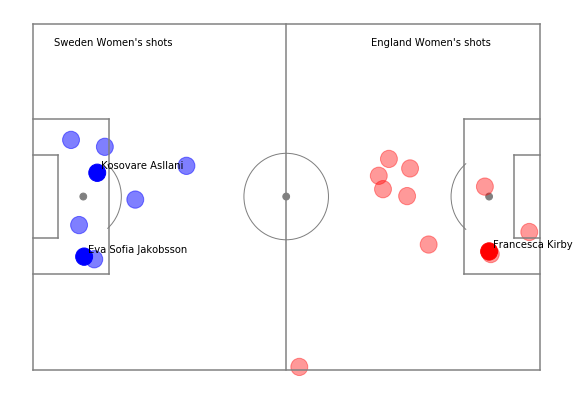

In [32]:
#Draw the pitch
(fig,ax) = Utils.createPitch(pitchLengthX,pitchWidthY,'yards','gray')
#Plot the shots
for i,shot in shots.iterrows():
    x=shot['location'][0]
    y=shot['location'][1]
    
    goal=shot['shot_outcome_name']=='Goal'
    team_name=shot['team_name']
    
    circleSize=2
    #circleSize=np.sqrt(shot['shot_statsbomb_xg'])*12

    if (team_name==home_team_required):
        if goal:
            shotCircle=plt.Circle((x,pitchWidthY-y),circleSize,color="red")
            plt.text((x+1),pitchWidthY-y+1,shot['player_name']) 
        else:
            shotCircle=plt.Circle((x,pitchWidthY-y),circleSize,color="red")     
            shotCircle.set_alpha(.4)
    elif (team_name==away_team_required):
        if goal:
            shotCircle=plt.Circle((pitchLengthX-x,y),circleSize,color="blue") 
            plt.text((pitchLengthX-x+1),y+1,shot['player_name']) 
        else:
            shotCircle=plt.Circle((pitchLengthX-x,y),circleSize,color="blue")      
            shotCircle.set_alpha(.5)
    ax.add_patch(shotCircle)
    
    
plt.text(5,75,away_team_required + ' shots') 
plt.text(80,75,home_team_required + ' shots') 
     
fig.set_size_inches(10, 7)

plt.show()

## Les passes d'une équipe durant la compétition 

In [33]:
team_required ="United States Women's"

#Find the matches they played
match_id_required=[]
for match in matches:
    home_team_name=match['home_team']['home_team_name']
    away_team_name=match['away_team']['away_team_name']
    if (home_team_name==team_required) or (away_team_name==team_required):
        match_id_required.append(match['match_id'])


In [34]:
#Find the passes for each match
for ic,match_id in enumerate(match_id_required):
    
    #Load in all match events 

    file_name=str(match_id)+'.json'
    with open('C:/Users/Ayoub/Desktop/data/events/'+file_name) as data_file:
        data = json.load(data_file)
    df = json_normalize(data, sep = "_").assign(match_id = file_name[:-5])
    team_actions = (df['team_name']==team_required)
    df = df[team_actions]
    
    #A dataframe of passes
    passes_match = df.loc[df['type_name'] == 'Pass'].set_index('id')
    #A dataframe of shots
    shots_match = df.loc[df['type_name'] == 'Shot'].set_index('id')
    
    #Find shot times in seconds
    #This should be adjusted to account for overlapping halves of the match.
    shot_times = shots_match['minute']*60+shots_match['second']
    shot_window = 15  
    shot_start = shot_times - shot_window
    pass_times = passes_match['minute']*60+passes_match['second']
    
    #Check with passes are whitin [shot_window] seconds of a shot
    
    def in_range(pass_time,start,finish):
        return (True in ((start < pass_time) & (pass_time < finish)).unique())

    pass_to_shot = pass_times.apply(lambda x: in_range(x,shot_start,shot_times))
    
    #Exclude corners
    iscorner = passes_match['pass_type_name']=='Corner'
    
    danger_passes=passes_match[np.logical_and(pass_to_shot,np.logical_not(iscorner))]
    
    if ic==0:
        passes =  danger_passes
    else:
        passes = passes.append(danger_passes)

    
    
    print('Match: ' + str(match_id) + '. Number of danger passes is: ' + str(len(danger_passes)))



C:\Users\Ayoub\anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  if __name__ == '__main__':


Match: 22974. Number of danger passes is: 67
Match: 69321. Number of danger passes is: 24
Match: 69202. Number of danger passes is: 27
Match: 22943. Number of danger passes is: 110
Match: 68345. Number of danger passes is: 42
Match: 69161. Number of danger passes is: 22
Match: 69258. Number of danger passes is: 29


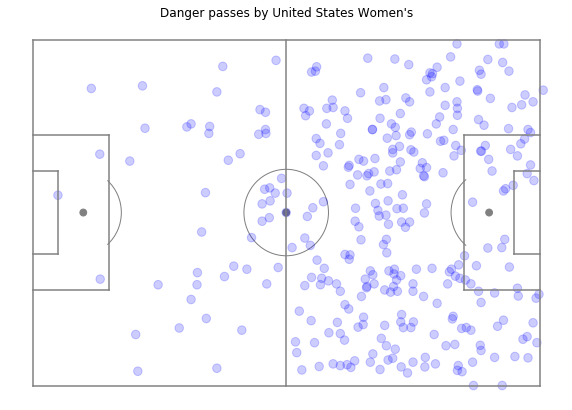

In [35]:
#Set number of matches
number_of_matches=ic+1

#Size of the pitch in yards (!!!)
pitchLengthX=120
pitchWidthY=80

#Plot the passes
(fig,ax) = createPitch(pitchLengthX,pitchWidthY,'yards','gray')
for i,thepass in passes.iterrows():
    x=thepass['location'][0]
    y=pitchWidthY-thepass['location'][1]
    passCircle=plt.Circle((x,y),1,color="blue")      
    passCircle.set_alpha(.2)   
    ax.add_patch(passCircle)

ax.set_title('Danger passes by ' + team_required)
fig.set_size_inches(10, 7)

plt.show()


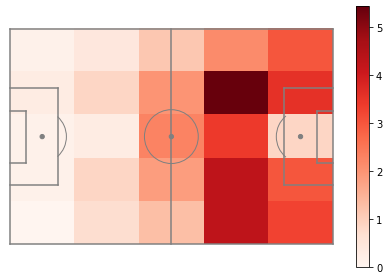

In [37]:
#Make x,y positions
x=[]
y=[]
for i,apass in passes.iterrows():
    x.append(apass['location'][0])
    y.append(pitchWidthY-apass['location'][1])

#Make a histogram of passes
H_Pass=np.histogram2d(y, x,bins=5,range=[[0, pitchWidthY],[0, pitchLengthX]])
(fig,ax) = createPitch(pitchLengthX,pitchWidthY,'yards','gray')
pos=ax.imshow(H_Pass[0]/number_of_matches, extent=[0,120,0,80], aspect='auto',cmap=plt.cm.Reds)
fig.colorbar(pos, ax=ax)
#ax.set_title('Danger passes per match by ' + team_required)
plt.xlim((-1,121))
plt.ylim((83,-3))
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

## Les passes de Lindsey Horan

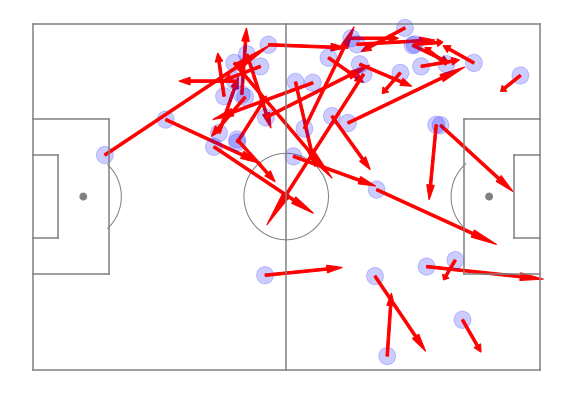

In [44]:
#dataframe of shots
passes = df.loc[df['type_name'] == 'Pass'].set_index('id')

#Draw the pitch
(fig,ax) = Utils.createPitch(pitchLengthX,pitchWidthY,'yards','gray')
for i,thepass in passes.iterrows():
    if thepass['player_name']=='Lindsey Horan':
    
        x=thepass['location'][0]
        y=thepass['location'][1]
        passCircle=plt.Circle((x,pitchWidthY-y),2,color="blue")      
        passCircle.set_alpha(.2)   
        ax.add_patch(passCircle)
        dx=thepass['pass_end_location'][0]-x
        dy=thepass['pass_end_location'][1]-y

        passArrow=plt.Arrow(x,pitchWidthY-y,dx,-dy,width=3,color="red")
        ax.add_patch(passArrow)

fig.set_size_inches(10, 7)

plt.show()